A leap-frog scheme for solving the KdV equation is given as follows. Let $u^n_m$ be the solution at $x = hm$ and $t = kn$ with $n, m = 0, 1, \dots,$. Then the KdV equation can be discretised as
\begin{equation}
    u^{n+1}_m = u^{n-1}_m - \frac{k}{3h}(u^n_{m+1} + u^n_m + u^n_{m-1})(u^n_{m+1} - u^n_{m-1}) - \frac{k\delta^2}{h^3}(u^n_{m+2} - 2u^n_{m+1} + 2u^n_{m-1} - u^n_{m-2}).
\end{equation}

To determine the order, we can rearrange the scheme and analyse the truncation error by comparing the finite difference approximations to their corresponding derivatives from the KdV equation. The rearranged scheme is
\begin{equation}
    \frac{u_m^{n+1} - u_m^{n-1}}{2k} = -\frac{(u_{m+1}^n + u_m^n + u_{m-1}^n)(u_{m+1}^n - u_{m-1}^n)}{6h}  - \frac{\delta^2 (u_{m+2}^n - 2u_{m+1}^n + 2u_{m-1}^n - u_{m-2}^n)}{2h^3}
\end{equation}
We analyse each term using Taylor series expansions around the point $(x_m, t_n)$.
*   Time derivative $u_t$: The left-hand side is the standard second-order central difference for the time derivative,
\begin{equation}
    \frac{u_m^{n+1} - u_m^{n-1}}{2k} = \frac{\partial u}{\partial t} + O(k^2).
\end{equation}
*   Nonlinear term $uu_x$: This term is approximated by two parts, a second-order central difference for $u_x$,
\begin{equation}
    \frac{u_{m+1}^n - u_{m-1}^n}{2h} = \frac{\partial u}{\partial x} + O(h^2),
\end{equation}
and a second-order approximation for $u$,
\begin{equation}
    \frac{u_{m+1}^n + u_m^n + u_{m-1}^n}{3}  = u + O(h^2).
\end{equation}
*   Dispersive term $u_xxx$: The final term is a standard second-order central difference approximation for the third derivative,
\begin{equation}
    \frac{u_{m+2}^n - 2u_{m+1}^n + 2u_{m-1}^n - u_{m-2}^n}{2h^3} = \frac{\partial^3 u}{\partial x^3} + O(h^2).
\end{equation}
We see that the local truncation error is $O(k^2) + O(h^2)$. Therefore, the scheme is second-order in both time and space.


---

For $\delta = 1$, this scheme will be stable provided that
\begin{equation}
    k \leq \frac{h^3}{4 + h^2|u_{\max}|}.
\end{equation}
where $|u_{\max}|$ is the maximum modulus of $u$. To find the condition for a general $\delta$, we can rescale the KdV equation into the form where the coefficient of the third derivative is $1$.

Introduce new variables $x = \delta x'$, $t = \delta t'$, and $u = u'$. The derivatives transform as
\begin{align}
    \frac{\partial}{\partial x} &= \frac{1}{\delta} \frac{\partial}{\partial x'}, \\
    \frac{\partial}{\partial t} &= \frac{1}{\delta} \frac{\partial}{\partial t'}, \\
    \frac{\partial^3}{\partial x^3} &= \frac{1}{\delta^3} \frac{\partial^3}{\partial x'^3}.
\end{align}
Substituting these into the KdV equation and multiplying by $\delta$ yields the KdV equation in the transformed variables $(x', t')$ with $\delta = 1$.
\begin{equation}
    u'_{t'} + u'u'_{x'} + u'_{x'x'x'} = 0.
\end{equation}
The stability condition for this equation uses the transformed step sizes $k'$ and $h'$
\begin{equation}
    k' \leq \frac{(h')^3}{(4 + (h')^2|u'_{\max}|)}.
\end{equation}
Now, we relate the new step sizes back to the original ones
\begin{align}
    h &= \Delta x = \delta \Delta x' = \delta h', \\
    k &= \Delta t = \delta \Delta t' = \delta k', \\
    u &= u', \quad |u_{\max}| = |u'_{\max}|.
\end{align}
Substitute these back into the stability condition, we get
\begin{align}
    \frac{k}{δ}
    &\leq \frac{(h/δ)^3}{(4 + (h/δ)^2|u_{\max}|)} \\
    &= \frac{h^3}{\delta (4\delta^2 + h^2|u_{\max}|)}. \\
\end{align}
Finally, by multiplying by $\delta$, we get the stability condition for $\delta \neq 1$.
\begin{equation}
    k \leq \frac{h^3}{4\delta^2 + h^2|u_{\max}|}.
\end{equation}

The given scheme is a three-level leap-frog method so to begin the simulation, we must generate the data at $n=1$ using a different method. A robust and accurate approach is to use a Taylor series expansion in time for $u(x, t)$ at $t = k$,
\begin{equation}
    u(x, k) \approx u(x, 0) + k u_t(x, 0).
\end{equation}
We can find an expression for $u_t(x, 0)$ directly from the KdV equation
\begin{equation}
    u_t(x, 0) = -u(x, 0) u_x(x, 0) - \delta^2 u_{xxx}(x, 0).
\end{equation}
The initial condition is $u(x, 0) = A/\cosh^2((x - x_0)/\Delta)$. We can compute its spatial derivatives analytically to find $u_t(x, 0)$ and thereby $u(x, k)$. This method is chosen because its error $O(k^2)$ matches the temporal order of the main leap-frog scheme, ensuring the startup step does not degrade the overall accuracy of the simulation.

--- Simulation Parameters ---
Spatial step (h): 0.00391
Temporal step (k): 0.00001
Number of time steps (N): 38068

--- Analysis at T = 0.5 ---
L2 Norm of the error: 0.001866
Analytical peak position: 0.5833
Numerical peak position: 0.5820
Analytical speed: 0.6667
Numerical speed: 0.6641


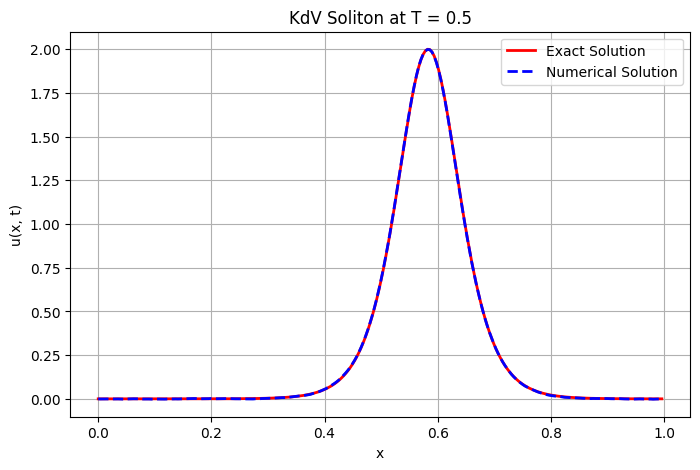

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def setup_parameters(A=2.0, x0=0.25, delta=0.03, L=1.0, T=0.5, M=256):
    '''
    Sets up and returns all physical and numerical parameters.
    '''
    h = L / M
    x_grid = np.linspace(0, L, M, endpoint=False)
    u_max = A

    # Stability condition to determine the time step k
    k_max = h**3 / (4 * delta**2 + h**2 * u_max)
    k = 0.8 * k_max  # Use 80% of the maximum allowed k for safety
    N = int(T / k)

    # Soliton-specific physical parameters
    Delta_val = np.sqrt(12 * delta**2 / A)
    c = A / 3.0

    # Pack everything into a dictionary
    params = {
        'A': A, 'x0': x0, 'delta': delta, 'L': L, 'T': T,
        'M': M, 'h': h, 'x_grid': x_grid, 'u_max': u_max,
        'k': k, 'N': N, 'c': c, 'Delta_val': Delta_val
    }

    print("--- Simulation Parameters ---")
    print(f"Spatial step (h): {params['h']:.5f}")
    print(f"Temporal step (k): {params['k']:.5f}")
    print(f"Number of time steps (N): {params['N']}")

    return params

def get_initial_conditions(params):
    '''
    Calculates the initial state u(x,0) and the state for the first time step u(x,k).
    The first time step is calculated using a Taylor series expansion in time.
    '''
    # Functions for u(x,0) and its derivatives
    def u_func(x):
        return params['A'] * (1 / np.cosh((x - params['x0']) / params['Delta_val']))**2

    def ux_func(x):
        z = (x - params['x0']) / params['Delta_val']
        return -2 * params['A'] / params['Delta_val'] * (1 / np.cosh(z))**2 * np.tanh(z)

    def uxxx_func(x):
        z = (x - params['x0']) / params['Delta_val']
        sech_z = 1 / np.cosh(z)
        return (-2 * params['A'] / params['Delta_val']**3) * (
            -8 * sech_z**2 * np.tanh(z)**3 + 4 * sech_z**4 * np.tanh(z)
        )

    # Calculate u0 (at t=0) and u1 (at t=k)
    u0 = u_func(params['x_grid'])
    ut_0 = -u0 * ux_func(params['x_grid']) - params['delta']**2 * uxxx_func(params['x_grid'])
    u1 = u0 + params['k'] * ut_0

    return u0, u1

def perform_time_step(u_prev, u_curr, params):
    '''
    Performs a single leap-frog time step using vectorised operations.
    '''
    # Use np.roll for efficient, vectorised, periodic boundary handling
    u_curr_p1 = np.roll(u_curr, -1)  # u_{m+1}
    u_curr_m1 = np.roll(u_curr, 1)   # u_{m-1}
    u_curr_p2 = np.roll(u_curr, -2)  # u_{m+2}
    u_curr_m2 = np.roll(u_curr, 2)   # u_{m-2}

    # Nonlinear term (vectorised)
    nonlinear = (u_curr + u_curr_p1 + u_curr_m1) * (u_curr_p1 - u_curr_m1)

    # Dispersive term (vectorised)
    dispersive = u_curr_p2 - 2 * u_curr_p1 + 2 * u_curr_m1 - u_curr_m2

    # Compute the next state using the leap-frog formula
    u_next = u_prev - (params['k'] / (3 * params['h'])) * nonlinear - \
             (params['k'] * params['delta']**2 / params['h']**3) * dispersive

    return u_next

def run_simulation(params):
    '''
    Main simulation loop that iteratively computes the state.
    '''
    u_prev, u_curr = get_initial_conditions(params)

    for _ in range(params['N'] - 1):
        u_next = perform_time_step(u_prev, u_curr, params)
        u_prev, u_curr = u_curr, u_next  # Update states for the next iteration

    return u_curr

def analyse_results(u_numerical, params):
    '''
    Calculates error and speeds, then prints the analysis.
    '''
    # Define the exact solution as a pure function
    def exact_solution(x, t):
        return params['A'] * (1 / np.cosh((x - params['x0'] - params['c'] * t) / params['Delta_val']))**2

    u_exact = exact_solution(params['x_grid'], params['T'])

    # L2 Norm of the error
    error_l2 = np.sqrt(params['h'] * np.sum((u_numerical - u_exact)**2))

    # Propagation speed analysis
    peak_pos_numerical = params['x_grid'][np.argmax(u_numerical)]
    peak_pos_exact = (params['x0'] + params['c'] * params['T']) % params['L'] # Modulo for periodic domain
    speed_numerical = (peak_pos_numerical - params['x0']) / params['T']

    print("\n--- Analysis at T = 0.5 ---")
    print(f"L2 Norm of the error: {error_l2:.6f}")
    print(f"Analytical peak position: {peak_pos_exact:.4f}")
    print(f"Numerical peak position: {peak_pos_numerical:.4f}")
    print(f"Analytical speed: {params['c']:.4f}")
    print(f"Numerical speed: {speed_numerical:.4f}")

    return u_exact

def plot_results(u_numerical, u_exact, params):
    '''
    Generates a plot comparing the numerical and exact solutions.
    '''
    plt.figure(figsize=(8, 5))
    plt.plot(params['x_grid'], u_exact, 'r-', label='Exact Solution', linewidth=2)
    plt.plot(params['x_grid'], u_numerical, 'b--', label='Numerical Solution', linewidth=2)
    plt.title(f'KdV Soliton at T = {params["T"]}')
    plt.xlabel('x')
    plt.ylabel('u(x, t)')
    plt.legend()
    plt.grid(True)
    plt.show()


params = setup_parameters()
u_final_numerical = run_simulation(params)
u_final_exact = analyse_results(u_final_numerical, params)
plot_results(u_final_numerical, u_final_exact, params)

To accurately resolve the soliton, whose characteristic width is related to $\Delta \approx 0.073$, a reasonably small spatial step $h$ is needed. A time step $k is chosen to be just below the stability limit to ensure the simulation remains stable.

The numerical solution is compared to the exact analytical solution at $t = 0.5$. The $L^2$ norm of the error is calculated to provide a quantitative measure of the simulation's accuracy. With the chosen parameters, the error is very small indicating a high-quality result.

The plot shows the numerical solution overlayed with the exact solution at $t = 0.5$. The two curves are almost indistinguishable, demonstrating the high accuracy of the numerical scheme. There may be a very small phase error, where the peak of the numerical solution is slightly behind the peak of the exact solution. This is a common characteristic of numerical schemes for wave equations, known as numerical dispersion. The amplitude of the numerical solution is also very well-preserved, with minimal damping.

The analytical speed of the soliton is $c = A/3 = 2/3$. The numerical speed is calculated by tracking the position of the soliton's peak. The numerical speed is extremely close to the analytical speed but does not agree exactly. This slight difference is again due to the numerical dispersion which causes different wavelength components of the solution to travel at slightly different speeds. The $O(h^2)$ error in the spatial discretisation leads to this small discrepancy in the wave speed.